<a href="https://colab.research.google.com/github/liuxin85/Images-classification/blob/main/classification_by_colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sokeyer","key":"0d760f64b460310f38ab381cac94ad21"}'}

In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle datasets download -d imoore/6000-store-items-images-classified-by-color

 64% 33.0M/51.2M [00:00<00:00, 39.4MB/s]
100% 51.2M/51.2M [00:00<00:00, 87.4MB/s]


In [4]:
!unzip 6000-store-items-images-classified-by-color.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/brown/105735637.jpg  
  inflating: train/brown/105736914.jpg  
  inflating: train/brown/105737049.jpg  
  inflating: train/brown/105739351.jpg  
  inflating: train/brown/105739998.jpg  
  inflating: train/brown/105741279.jpg  
  inflating: train/brown/105742121.jpg  
  inflating: train/brown/105743307.jpg  
  inflating: train/brown/105743416.jpg  
  inflating: train/brown/105745625.jpg  
  inflating: train/brown/105745658.jpg  
  inflating: train/brown/105745804.jpg  
  inflating: train/brown/105746292.jpg  
  inflating: train/brown/105747025.jpg  
  inflating: train/brown/105751285.jpg  
  inflating: train/brown/105751947.jpg  
  inflating: train/brown/105752947.jpg  
  inflating: train/brown/105753529.jpg  
  inflating: train/brown/105754762.jpg  
  inflating: train/brown/105756364.jpg  
  inflating: train/brown/105757456.jpg  
  inflating: train/brown/105757491.jpg  
  inflating: train/brown/105759450.jpg  
  infl

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import numpy as np
import pandas
import os
import warnings
import cv2

warnings.filterwarnings('ignore')

In [24]:
main_file = "/content"

available_files = os.listdir(main_file)
print("Available files are: \n\t{}".format(available_files))

Available files are: 
	['.config', 'train', '6000-store-items-images-classified-by-color.zip', 'test', 'sample_data']


In [27]:
training = os.path.join(main_file, 'train')
testing = os.path.join(main_file, 'test') 

In [28]:
training_images = {category: [] for category in os.listdir(os.path.join(training))}
testing_images = []

In [29]:
labels = {ix: category for ix, category in enumerate(list(training_images.keys()))}
labels

{0: 'orange',
 1: 'yellow',
 2: 'grey',
 3: 'purple',
 4: 'white',
 5: 'red',
 6: 'green',
 7: 'blue',
 8: 'pink',
 9: 'brown',
 10: 'silver',
 11: 'black'}

In [30]:
n_H = 160
n_W = 160
n_C = 3

for file in ['training', 'testing']:
    for category in range(12):
        if file == 'training':
            for image in os.listdir(os.path.join(training, labels[category])):
                img = plt.imread(os.path.join(training, labels[category], image))
                training_images[labels[category]].append((cv2.resize(img, (n_H, n_W)), category))
        else:
            for image in os.listdir(os.path.join(testing)):
                img = plt.imread(os.path.join(testing, image))
                testing_images.append(cv2.resize(img, (n_H, n_W)))

In [32]:
print("Training set ...")

for category in range(12):
    print("There are {} image in the category of {}".\
          format(len(training_images[labels[category]]), labels[category]))

Training set ...
There are 318 image in the category of orange
There are 427 image in the category of yellow
There are 686 image in the category of grey
There are 352 image in the category of purple
There are 706 image in the category of white
There are 689 image in the category of red
There are 704 image in the category of green
There are 651 image in the category of blue
There are 341 image in the category of pink
There are 681 image in the category of brown
There are 350 image in the category of silver
There are 334 image in the category of black


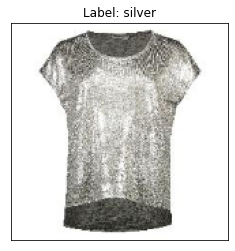

In [35]:
Index = 3
cate = np.random.choice([int(i) for i in range(12)])
image = training_images[labels[cate]][Index][0]
target = training_images[labels[cate]][Index][1]

plt.imshow(image)
plt.title("Label: {}".format(labels[target]))
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
def get_inputs(training_images, train_size = None, dev_size = None) :
    m_examples = 0
    for category in list(training_images.keys()) : 
        m_examples += len(training_images[category])
    
    m_train = np.floor(np.multiply(train_size, m_examples))
    m_dev = np.subtract(m_examples, m_train)
    
    x_train = np.zeros([int(m_train), n_H, n_W, n_C])
    y_train = np.zeros([1, int(m_train)])
    
    x_dev = np.zeros([int(m_dev), n_H, n_W, n_C])
    y_dev = np.zeros([1, int(m_dev)])
    
    all_images = []
    for category in range(12) : 
        for item in training_images[labels[category]] : 
            all_images.append(item)
    np.random.shuffle(all_images)
    
    for train_image in range(int(m_train)) : 
        x_train[train_image] = all_images[train_image][0]
        y_train[:, train_image] = all_images[train_image][1] 
        
    #for dev_image in range(int(m_dev)) :
    #    x_dev[dev_image] = all_images[dev_image][0]
        #y_dev[dev_image] = all_images[dev_image][1]
    
    return x_train, y_train

In [37]:
x_train, y_train = get_inputs(training_images, train_size = 0.8, dev_size = 0.2)